In [1]:
# numpy and pandas are needed throughout the whole project. 
# It is helpful to Pre-load these packages.

import numpy as np # for using numpy ndarray
import pandas as pd # for reading csv input file: pd.read_csv

import os
'''
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''

import time
# For timing the whole project in one shot.
start_time_1 = time.time()

## 1.Importing the libraries

In [2]:
start_time = time.time()
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------Import Machine Learning libraries---------------------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression                 # To scaled data with mean 0 and variance 1
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.tree import DecisionTreeClassifier                     # To implement decision tree classifier
from sklearn.metrics import classification_report                   # To generate classification report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
#-------------------------------------Import Parallelism libraries--------------------------------------------------
from multiprocessing import Process, Manager


import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")
print("time elapsed: ", time.time() - start_time)

time elapsed:  5.01764702796936


## 2. Data Acquisition & Description

In [3]:
start_time = time.time()
#Lets look at our dataset
data_path = './'
data = pd.read_csv(f'{data_path}/creditcard_2023.csv')
print(data.head())
print("time elapsed: ", time.time() - start_time)

   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  C

In [4]:
print('Shape of our Data set -',data.shape)
print(data.info())

Shape of our Data set - (568630, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568

- There are 568630 records, 28 features which are abstracted from real-world observations
- There is one extra feature, the amount of transaction made, totally 29 features
- **'Class'** is the target indicating whether the transaction is fraudulent (1) or not (0).

## 3. Data Preprocessing

In [5]:
print(f'There are {data.isna().sum().sum() } missing values (NA) in the dataset')
print(f'There are duplicated values in the dataset? {data.duplicated().any() }')


There are 0 missing values (NA) in the dataset
There are duplicated values in the dataset? False


dtype also looks fine.

## Exploratory Data Analysis

A correlation heatmap to display the correlation between multiple variables as a color-coded matrix.   
Each variable is represented by a row and a column, and the cells show the correlation between them.   
The color of each cell represents the strength and direction of the correlation,   
with darker colors indicating stronger correlations.  

data.corr() computes the pairwise correlation of columns in the data.
cmap='coolwarm' sets the color map to ‘coolwarm’, which is a diverging colormap that goes from blue (negative correlation) to red (positive correlation).
annot=True ensures that the correlation values are written on the cells of the heatmap.

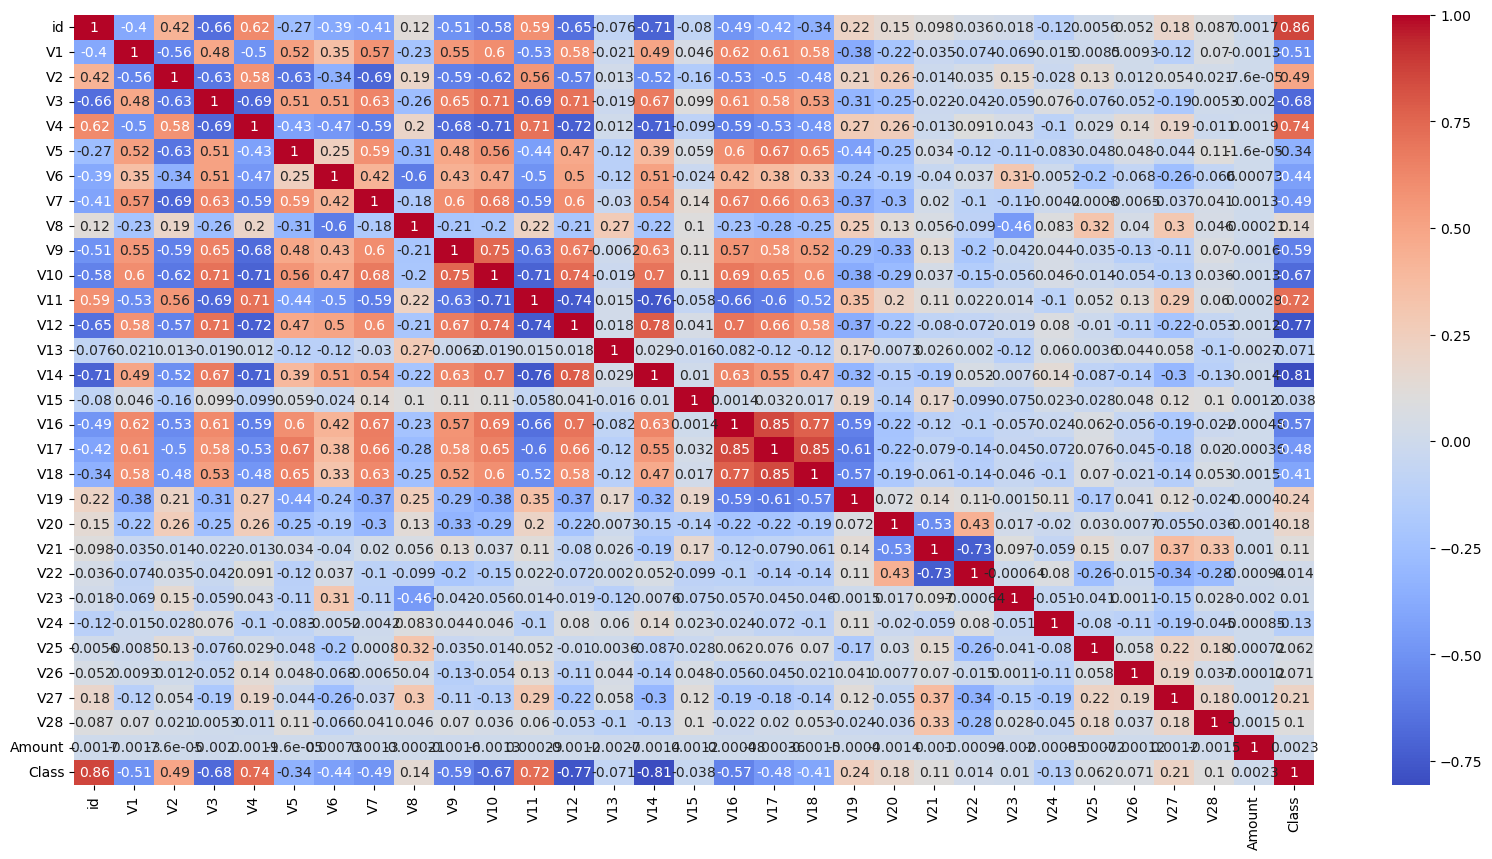

Elapsed time:  3.600017547607422


In [6]:
start_time=time.time()
plt.figure(figsize=[20,10])
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)
plt.show()
end_time = time.time()
print("Elapsed time: ", end_time-start_time)

### From the heatmap, these observations can be made ###
There is a strong correlation between the features V17 and V18.  
Features V16 and V17 are also highly correlated.  
An inverse correlation is observed between V14 and V4.  
V12 exhibits a negative correlation with both V10 and V11.  
V11 is negatively correlated with V10, but shows a positive correlation with V4.  
V3 is positively correlated with both V10 and V12.  
A positive correlation is also noted between V9 and V10.  
In these statements, V17, V18, etc., represent different features of the dataset.  

In [7]:
#the skewness of our features

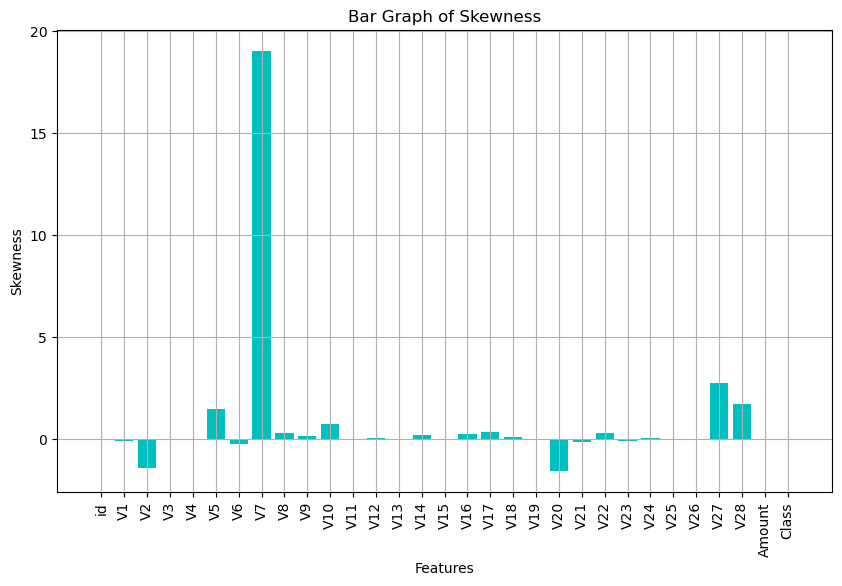

In [8]:
skewness = data.skew()

plt.figure(figsize=(10, 6))
plt.bar(skewness.index, skewness.values, color='c')
plt.title('Bar Graph of Skewness')
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

- Features V2,V20 are negatively skewed. 
- Features V5, V7, V27, V28 are positively skewed. 
- The amount of transaction are normally distributed.

In [9]:
# the distribution of 'amount feature'

<Axes: title={'center': 'Box-whisker graph of amount'}, ylabel='Amount'>

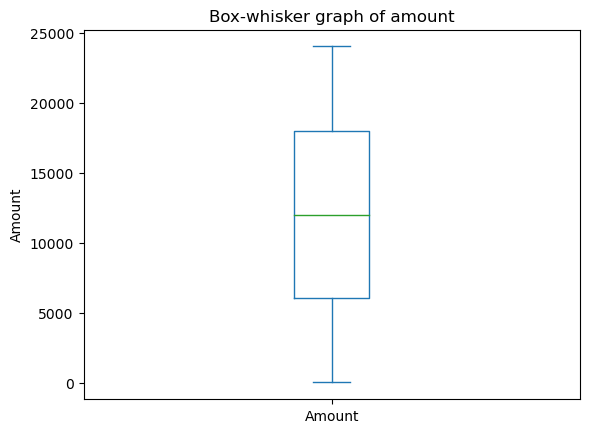

In [10]:
plt.title('Box-whisker graph of amount')
plt.ylabel('Amount')
data['Amount'].plot.box()

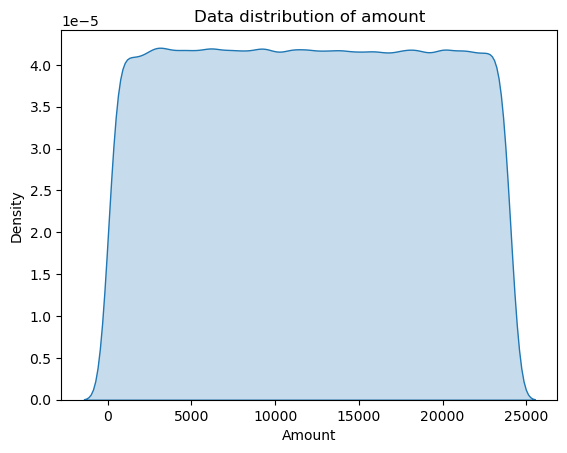

In [11]:
sns.kdeplot(data=data['Amount'], shade=True)
plt.title('Data distribution of amount')
plt.show()

Amount is Normally distributed.

In [12]:
#Lets look at at features V1,V10,V23 and V12

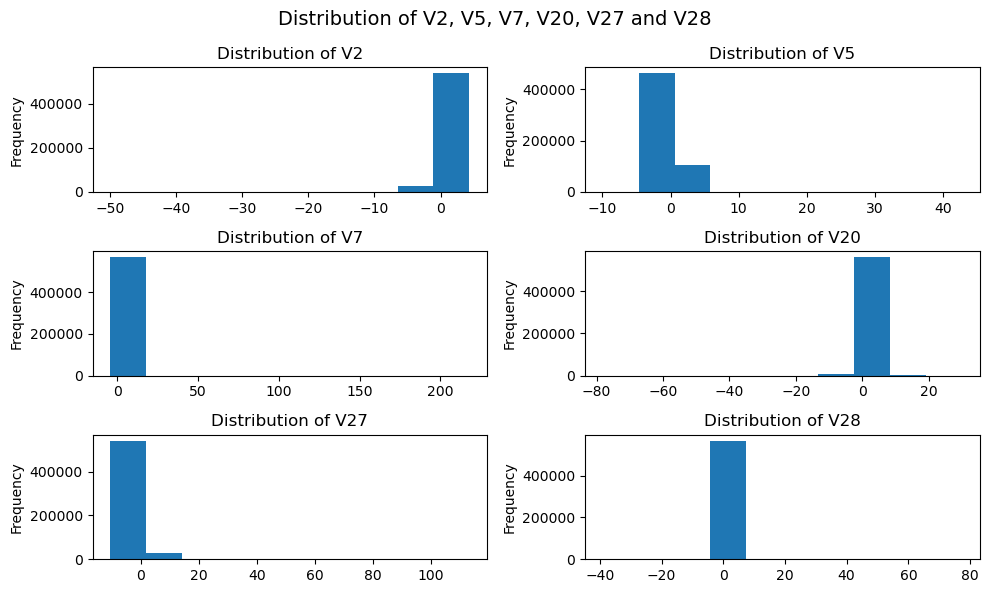

time elapsed:  1.2829949855804443


In [13]:
start_time = time.time()
# Lets plot a histogram
paper, axes = plt.subplots(3, 2, figsize=(10, 6))
data['V2'].plot(kind='hist', ax=axes[0,0], title='Distribution of V2')
data['V5'].plot(kind='hist', ax=axes[0,1], title='Distribution of V5')
data['V7'].plot(kind='hist', ax=axes[1,0], title='Distribution of V7')
data['V20'].plot(kind='hist', ax=axes[1,1], title='Distribution of V20')
data['V27'].plot(kind='hist', ax=axes[2,0], title='Distribution of V27')
data['V28'].plot(kind='hist', ax=axes[2,1], title='Distribution of V28')
plt.suptitle('Distribution of V2, V5, V7, V20, V27 and V28',size=14)
plt.tight_layout()
plt.show()
print("time elapsed: ", time.time() - start_time)

The output feature 'Class', 1 = fraud, 0 = non-fraud

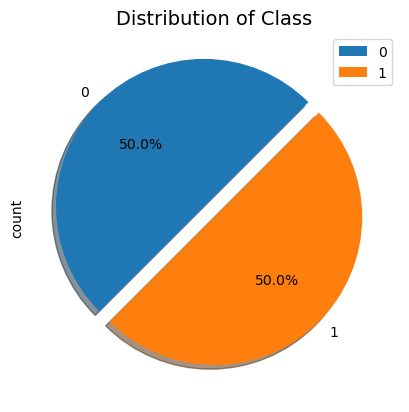

time elapsed:  0.15781784057617188


In [14]:
start_time = time.time()
data['Class'].value_counts().plot.pie(explode=[0.1,0],autopct='%3.1f%%'
                                     ,shadow=True, legend= True,startangle =45)
plt.title('Distribution of Class',size=14)
plt.show()
print("time elapsed: ", time.time() - start_time)

The output feature is equally balanced.

## 4. Data Preparation ##

Divide the data into dependent and independent features

In [15]:
start_time = time.time()
x = data.drop(['id','Class'],axis=1)
y = data.Class
print("time elapsed: ", time.time() - start_time)

time elapsed:  0.08320832252502441


In [16]:
print('Shape of x',x.shape)
print('Shape of y',y.shape)

Shape of x (568630, 29)
Shape of y (568630,)


Normalize all features using standard scaler

In [17]:
start_time = time.time()
sc = StandardScaler()
x_scaled = sc.fit_transform(x) 
x_scaled_df = pd.DataFrame(x_scaled,columns=x.columns)
print(x_scaled_df.head())
print("time elapsed: ", time.time() - start_time)

         V1        V2        V3        V4        V5        V6        V7  \
0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0 -0.130006  0.727159  0.637735  ...  0.091202 -0.110552  0.217606 -0.134794   
1 -0.133118  0.347452  0.529808  ... -0.233984 -0.194936 -0.605761  0.079469   
2 -0.095576 -0.261297  0.690708  ...  0.361652 -0.005020  0.702906  0.945045   
3 -0.065130 -0.205698  0.575231  ... -0.378223 -0.146927 -0.038212 -0.214048   
4 -0.212660  1.049921  0.968046  ...  0.247237 -0.106984  0.729727 -0.161666   

        V24       V25       V26       V27       V28    Amount  
0  0

Split dataset into train and test sets

In [18]:
start_time = time.time()
x_train,x_test,y_train,y_test = train_test_split(x_scaled_df,y,test_size=0.25,random_state=15,stratify= y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print("time elapsed: ", time.time() - start_time)

(426472, 29)
(142158, 29)
(426472,)
(142158,)
time elapsed:  0.31785154342651367


## 5. Modelling ##

A function for getting model accuracy

In [19]:
def model_accuracy(actual, predicted):
  acc_score = accuracy_score(actual, predicted)
  #print('Model Accuracy is: ', round(acc_score, 2))
  return round(acc_score, 2)


### Logistic Regression

In [20]:
# build a Logistic Regression Model

In [21]:
start_time = time.time()
lr=LogisticRegression()
lr.fit(x_train,y_train)
print("time elapsed: ", time.time() - start_time)

time elapsed:  1.441338062286377


In [22]:
#The score of this model
preds_lr_train = lr.predict(x_train)
preds_lr_test = lr.predict(x_test)
print("The accuracy of Logistic Regression model on training set: ", model_accuracy(y_train,preds_lr_train))
print("The accuracy of Logistic Regression model on testing set: ", model_accuracy(y_test,preds_lr_test))

The accuracy of Logistic Regression model on training set:  0.97
The accuracy of Logistic Regression model on testing set:  0.96


The Logistic Regression Model has 96% Accuracy.  
This model is too simple and the time required is only less than 2s,  
There is no need to parallelize this model.  
It suits the situation where the accuracy is not the main concern, but the time of turn over.  

###  Decision Tree

In [23]:
start_time = time.time()
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
accuracy = dtree.score(x_test, y_test)
end_time = time.time()
print("time elapsed: ", end_time - start_time)
time_dtree_single = end_time - start_time

time elapsed:  40.89221000671387


In [24]:
accuracy

0.9977841556577892

In [25]:
start_time = time.time()
preds_dtree_train = dtree.predict(x_train)
preds_dtree_test = dtree.predict(x_test)
print("The accuracy of Decision Tree model on training set: ", model_accuracy(y_train,preds_dtree_train))
print("The accuracy of Decision Tree  model on testing set: ", model_accuracy(y_test,preds_dtree_test))
print("time elapsed: ", time.time() - start_time)

The accuracy of Decision Tree model on training set:  1.0
The accuracy of Decision Tree  model on testing set:  1.0
time elapsed:  0.21079540252685547


#### Parallelizing the decision tree model ####
1. With Multiprocessing.Process() method

In [26]:
from sklearn.tree import DecisionTreeClassifier
from multiprocessing import Process, Manager

# Define function for decision tree modeling
def decision_tree_model(training_set):
    x_train, y_train = training_set
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(x_train, y_train)
    
    
num_Processes = [1,2,4,6,8]
times_Processes = [time_dtree_single] 

In [27]:
# The 1st element 1 in num_Processes is skipped, because it is run as the single process example

for n_proc in num_Processes[1:]:
    start_time = time.time()

    # Create 4 processes
    processes = []
    split_x_train = np.array_split(x_train, n_proc)
    split_y_train = np.array_split(y_train, n_proc)

    for i in range(n_proc):
        p = Process(target=decision_tree_model, args=((split_x_train[i], split_y_train[i]),))
        processes.append(p)
        p.start()

    # Ensure all processes have finished execution
    for p in processes:
        p.join()

    end_time = time.time()
    times_Processes.append(end_time-start_time)
    print("Elapsed time: ", end_time-start_time)

Elapsed time:  19.624347448349
Elapsed time:  9.132721185684204
Elapsed time:  7.7479331493377686
Elapsed time:  7.248156309127808


In [28]:
for n_proc, t in zip(num_Processes, times_Processes):
    print("number of processes: ", n_proc, " time taken: ", t, " s.")

number of processes:  1  time taken:  40.89221000671387  s.
number of processes:  2  time taken:  19.624347448349  s.
number of processes:  4  time taken:  9.132721185684204  s.
number of processes:  6  time taken:  7.7479331493377686  s.
number of processes:  8  time taken:  7.248156309127808  s.


2. With Multiprocessing.Pool() method

In [29]:
from multiprocessing import Pool
import time
# Define function for decision tree modeling
def decision_tree_model(_):
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(x_train, y_train)

num_Pools = [1,2,4,6,8]
times_Pools = [time_dtree_single] 

In [30]:
# Create a Pool object with n_pool processes
import numpy as np
   
for n_Pool in num_Pools[1:]:
    split_x_train = np.array_split(x_train, n_Pool)
    split_y_train = np.array_split(y_train, n_Pool)
    start_time = time.time()
    with Pool(processes=n_Pool) as pool:
        # Use map to apply the decision tree model function to each process
        pool.map(decision_tree_model, zip(split_x_train[:n_Pool], split_y_train[:n_Pool]))
    end_time = time.time()
    times_Pools.append(end_time-start_time)
    # Print accuracy from all processes
    print(n_Pool, " Pools used, time taken: ", end_time-start_time)

2  Pools used, time taken:  43.972957372665405
4  Pools used, time taken:  44.98807072639465
6  Pools used, time taken:  73.28986096382141
8  Pools used, time taken:  96.40173625946045


There is no accelerating effect using Pool() with dtree.fit()  

A relevant discussion can be found here:  

https://stackoverflow.com/questions/52045028/using-multiprocessing-pool-with-sklearn-code-runs-but-cores-dont-show-any-w  
Note: Functionality within this package requires that the __ main__ module be importable by the children. This is covered in Programming guidelines however it is worth pointing out here. This means that some examples, such as the multiprocessing.pool.Pool examples will not work in the interactive interpreter.

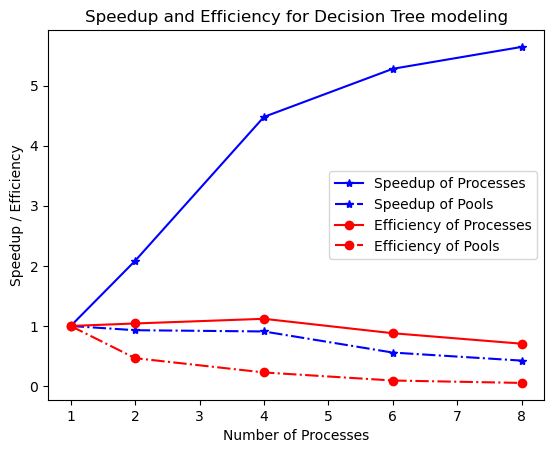

In [31]:
# Calculate speedup
speedup_Processes = [time_dtree_single / t for t in times_Processes]
speedup_Pool = [time_dtree_single / t for t in times_Pools]

# Calculate efficiency
efficiency_Processes = [s / cpus for s, cpus in zip(speedup_Processes, num_Processes)]
efficiency_Pools = [s / cpus for s, cpus in zip(speedup_Pool, num_Pools)]

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot speedup
ax.plot(num_Processes, speedup_Processes, marker='*', linestyle='-', color='b', label='Speedup of Processes')
ax.plot(num_Pools, speedup_Pool, marker='*', linestyle='-.', color='b', label='Speedup of Pools')

# Plot efficiency
ax.plot(num_Processes, efficiency_Processes, marker='o', linestyle='-', color='r', label='Efficiency of Processes')
ax.plot(num_Pools, efficiency_Pools, marker='o', linestyle='-.', color='r', label='Efficiency of Pools')

# Set labels and title
ax.set_xlabel('Number of Processes')
ax.set_ylabel('Speedup / Efficiency')
ax.set_title('Speedup and Efficiency for Decision Tree modeling')

# Add a legend
ax.legend()

# Show the plot
plt.show()

### Random Forest
run a single threaded job first

In [32]:
import time
from sklearn.ensemble import RandomForestClassifier
start_time = time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
end_time = time.time()
time_rf_single = end_time - start_time
print("time elapsed: ", end_time - start_time)

time elapsed:  355.2530736923218


In [33]:
# The score of this model
import time
start_time = time.time()
preds_rf_train = rf.predict(x_train)
preds_rf_test = rf.predict(x_test)
rf_score_1 = model_accuracy(y_train, preds_rf_train)
rf_score_2 = model_accuracy(y_test, preds_rf_test)

print("score: ", rf_score_1, rf_score_2)
print("time elapsed: ", time.time() - start_time)


score:  1.0 1.0
time elapsed:  7.049540758132935


Random Forest gives a score of 1.0.   
Now we will try to parallelize random forest to accelerate it.  
- Random Forest with multiprocessing.Process()

In [34]:
from multiprocessing import Process, Manager

# Define function for decision tree modeling
def random_forest_model(training_set):
    x_train, y_train = training_set
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(x_train, y_train)

    
num_Processes = [1,2,4,6,8]
times_Processes = [time_rf_single] 

In [35]:
# The 1st element 1 in num_Processes is skipped, because it is run as the single process example
import numpy as np
for n_proc in num_Processes[1:]:
    start_time = time.time()
    # Create n_proc processes
    processes = []
    split_x_train = np.array_split(x_train, n_proc)
    split_y_train = np.array_split(y_train, n_proc)
    for i in range(n_proc):
        p = Process(target=random_forest_model, args=((split_x_train[i], split_y_train[i]),))
        processes.append(p)
        p.start()

    # Ensure all processes have finished execution
    for p in processes:
        p.join()

    end_time = time.time()
    times_Processes.append(end_time-start_time)
    print("Elapsed time: ", end_time-start_time)

Elapsed time:  173.91658306121826
Elapsed time:  70.60920333862305
Elapsed time:  68.57112121582031
Elapsed time:  63.717862606048584


- Random Forest with multiprocessing.Pool()

In [36]:
from multiprocessing import Pool
import time
# Define function for decision tree modeling
def random_forest_model(data):
    x_train, y_train = data
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(x_train, y_train)

num_Pools = [1,2,4,6,8]
times_Pools = [time_rf_single] 

In [37]:
# Create a Pool object with n_pool processes
import numpy as np
for n_Pool in num_Pools[1:]:
    split_x_train = np.array_split(x_train, n_Pool)
    split_y_train = np.array_split(y_train, n_Pool)
    start_time = time.time()
    with Pool(processes=n_Pool) as pool:
        # Use map to apply the decision tree model function to each process
        pool.map(random_forest_model, zip(split_x_train[:n_Pool], split_y_train[:n_Pool]))
    end_time = time.time()
    times_Pools.append(end_time-start_time)
    # Print accuracy from all processes
    print(n_Pool, " Pools used, time taken: ", end_time-start_time)

2  Pools used, time taken:  156.83010959625244
4  Pools used, time taken:  70.90264964103699
6  Pools used, time taken:  73.86366581916809
8  Pools used, time taken:  63.56437611579895


- Random Forest parallelized with dask

from dask.distributed import Client
from sklearn.ensemble import RandomForestClassifier
import dask.dataframe as dd
from dask import compute
num_workers = [1,2,4,6,8]
times_dask = [time_rf_single] 
for n_workers in num_workers[1:]:
    start_time = time.time()
    client = Client(n_workers=n_workers)
    x_train_dask = dd.from_pandas(x_train, npartitions=n_workers)
    y_train_dask = dd.from_pandas(y_train, npartitions=n_workers)
    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(x_train_dask.compute(), y_train_dask.compute())
    end_time = time.time()
    print("dask job with ", n_workers, " workers, time taken: ", end_time-start_time)
    times_dask.append(end_time-start_time)
    client.close()

- Random Forest parallelized with joblib (n_jobs)

In [38]:
from sklearn.ensemble import RandomForestClassifier
import joblib
import time

num_jobs = [1,2,4,6,8]
times_joblib = [time_rf_single]

for n_jobs in num_jobs[1:]:
    start_time = time.time()
    clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=n_jobs)
    with joblib.parallel_backend('threading', n_jobs=n_jobs):
        clf.fit(x_train, y_train)
    end_time = time.time()
    print("joblib job with ", n_jobs, " jobs, time taken: ", end_time-start_time)
    times_joblib.append(end_time-start_time)

joblib job with  2  jobs, time taken:  192.75726675987244
joblib job with  4  jobs, time taken:  110.37922215461731
joblib job with  6  jobs, time taken:  106.24447870254517
joblib job with  8  jobs, time taken:  109.88482141494751


In [58]:
from sklearn.ensemble import RandomForestClassifier
from dask.distributed import Client
import time

num_workers = [1, 2, 4, 6, 8]
times_dask = [time_rf_single]

for n_workers in num_workers[1:]:
    client = Client(n_workers=n_workers, threads_per_worker=1)
    start_time = time.time()
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    with client:
        clf.fit(x_train, y_train)
    end_time = time.time()
    print("Dask job with ", n_workers, " workers, time taken: ", end_time - start_time)
    client.close()
    times_dask.append(end_time - start_time)

# Compare the execution times with Joblib and Dask
print("Joblib:", times_joblib)
print("Dask:", times_dask)

Dask job with  2  workers, time taken:  357.2110981941223
Dask job with  4  workers, time taken:  365.77801871299744
Dask job with  6  workers, time taken:  378.9449152946472
Dask job with  8  workers, time taken:  385.3252341747284
Joblib: [260.79818391799927, 337.2309956550598, 168.56927037239075, 144.81069779396057, 185.1511254310608]
Dask: [355.2530736923218, 357.2110981941223, 365.77801871299744, 378.9449152946472, 385.3252341747284]


In [69]:
# Create a dictionary with all run times in 4 cases
run_times_rf = dict(zip(num_jobs, zip(times_Processes, times_Pools, times_dask, times_joblib)))
#run_times_rf = dict(zip(num_jobs, zip(times_Processes, times_Pools, times_joblib)))
# Create a DataFrame from the dictionary
run_times_rf  = pd.DataFrame(run_times_rf , index=['times_Processes', 'times_Pools', 'times_dask', 'times_joblib'])
#run_times_rf  = pd.DataFrame(run_times_rf , index=['times_Processes', 'times_Pools', 'times_joblib'])
# show the tabulated result
run_times_rf 

,1,2,4,6,8
times_Processes,355.253074,173.916583,70.609203,68.571121,63.717863
times_Pools,355.253074,156.830110,70.902650,73.863666,63.564376
times_dask,355.253074,357.211098,365.778019,378.944915,385.325234
times_joblib,355.253074,337.230996,168.569270,144.810698,185.151125


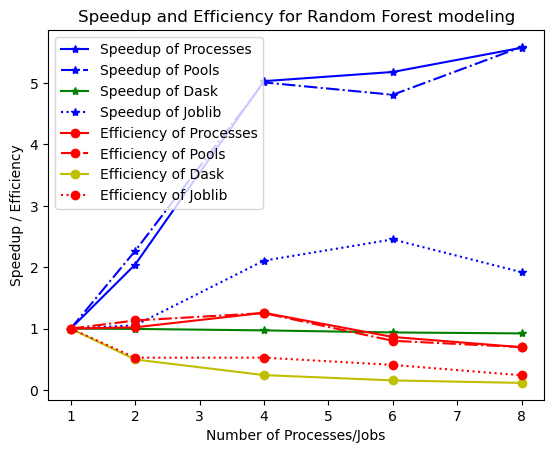

In [68]:
# Calculate speedup
speedup_Processes = [time_rf_single / t for t in times_Processes]
speedup_Pools = [time_rf_single / t for t in times_Pools]
speedup_dask = [time_rf_single / t for t in times_dask]
speedup_joblib = [time_rf_single / t for t in times_joblib]

# Calculate efficiency
efficiency_Processes = [s / cpus for s, cpus in zip(speedup_Processes, num_Processes)]
efficiency_Pools = [s / cpus for s, cpus in zip(speedup_Pools, num_Pools)]
efficiency_dask = [s / cpus for s, cpus in zip(speedup_dask, num_workers)]
efficiency_joblib = [s / cpus for s, cpus in zip(speedup_joblib, num_jobs)]

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot speedup
ax.plot(num_Processes, speedup_Processes, marker='*', linestyle='-', color='b', label='Speedup of Processes')
ax.plot(num_Pools, speedup_Pools, marker='*', linestyle='-.', color='b', label='Speedup of Pools')
ax.plot(num_workers, speedup_dask, marker='*', linestyle='-', color='g', label='Speedup of Dask')
ax.plot(num_jobs, speedup_joblib, marker='*', linestyle=':', color='b', label='Speedup of Joblib')

# Plot efficiency
ax.plot(num_Processes, efficiency_Processes, marker='o', linestyle='-', color='r', label='Efficiency of Processes')
ax.plot(num_Pools, efficiency_Pools, marker='o', linestyle='-.', color='r', label='Efficiency of Pools')
ax.plot(num_workers, efficiency_dask, marker='o', linestyle='-', color='y', label='Efficiency of Dask')
ax.plot(num_jobs, efficiency_joblib, marker='o', linestyle=':', color='r', label='Efficiency of Joblib')

# Set labels and title
ax.set_xlabel('Number of Processes/Jobs')
ax.set_ylabel('Speedup / Efficiency')
ax.set_title('Speedup and Efficiency for Random Forest modeling')

# Add a legend
ax.legend()

# Show the plot
plt.show()

### Gradient Boost 

- Using joblib's n_jobs parameter

In this section, numbers of parallel threads are designated to run the fitting of Gradient Boost model in scikit-learn for the purpose of comparison of the speedup.

In [41]:
import xgboost as xgb

The parallelism is first implemented using the n_jobs parameter in scikit-learn

In [42]:
cpu_values = [1,2,4,6,8]
times = []
model = xgb.XGBRFClassifier()
for cpu in cpu_values:
    model.set_params(**{'n_jobs': cpu})
    start = time.time()
    model.fit(x_train, y_train)
    end = time.time()
    times.append(end - start)

In [43]:
for elapsed_time, cpus in zip(times, cpu_values):
    print("cpus: ", cpus, " elapsed time: " , elapsed_time, "s")

cpus:  1  elapsed time:  8.3834068775177 s
cpus:  2  elapsed time:  5.011113405227661 s
cpus:  4  elapsed time:  3.112335205078125 s
cpus:  6  elapsed time:  3.7643449306488037 s
cpus:  8  elapsed time:  4.276526927947998 s


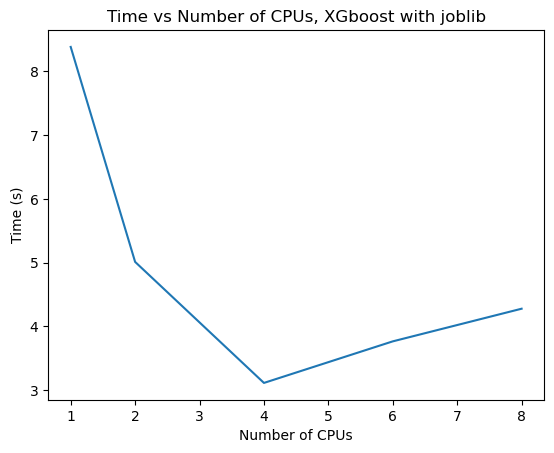

In [44]:
# Plot the time varies on the number of CPUs
plt.plot(cpu_values, times)
plt.xlabel('Number of CPUs')
plt.ylabel('Time (s)')
plt.title('Time vs Number of CPUs, XGboost with joblib')
plt.show()

To calculate the speedup and efficiency, the following formulas can be used:

Speedup is the ratio of the time taken to complete a task with one worker to the time taken with n workers.   
It’s calculated as Speedup = T1 / Tn,   
where T1 is the execution time with one worker and Tn is the execution time with n workers.  


Efficiency is the ratio of speedup to the number of workers.   
It’s calculated as Efficiency = Speedup / n, where n is the number of workers.

In [45]:
time_one_cpu = times[0]

speedups = [time_one_cpu / time for time in times]
efficiencies = [speedup / cpus for speedup, cpus in zip(speedups, cpu_values)]

#len(speedups), len(efficiencies), len(cpu_values)



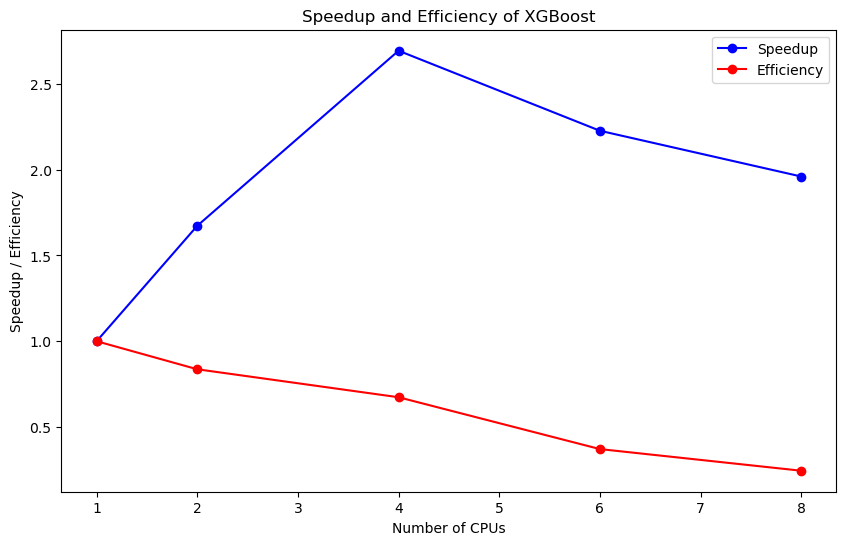

In [46]:
plt.figure(figsize=(10, 6))

plt.plot(cpu_values, speedups, marker='o', linestyle='-', color='b', label='Speedup')
plt.plot(cpu_values, efficiencies, marker='o', linestyle='-', color='r', label='Efficiency')

plt.xlabel('Number of CPUs')
plt.ylabel('Speedup / Efficiency')
plt.title('Speedup and Efficiency of XGBoost')
plt.legend()

plt.show()

- Gradient Boost with Dask  
The second trial is done by using Distributed XGBoost with Dask

In [47]:
from xgboost.dask import DaskDMatrix, train
from dask.distributed import Client
cpu_values_dask = [2,4,6,8]
print(cpu_values_dask)

[2, 4, 6, 8]


run a single thread example for reference

In [48]:
start_time = time.time()
xgclf = xgb.XGBRFClassifier()
xgclf.fit(x_train,y_train)
end_time = time.time() 
time_dask=[]
time_dask.append(end_time - start_time)
print("time elapsed: ", end_time - start_time)
preds_xgb_test = xgclf.predict(x_test)
print("The accuracy of Gradient Boost model on testing set: ", model_accuracy(y_test,preds_xgb_test))

time elapsed:  3.156181812286377
The accuracy of Gradient Boost model on testing set:  0.97


It's noticed that when using dask client, the number of workers cannot be set to 1  
Hence, the following snippet starts with n_workers = 2

In [49]:
import dask.dataframe as dd
for cpu in cpu_values_dask:
    # Use dask xgboost and dask distributed scheduler with n_workers=4, threads_per_worker=1 to train the model
    client = Client(n_workers=cpu, threads_per_worker=1)

    # Convert pandas DataFrame to Dask DataFrame
    x_train_dask = dd.from_pandas(x_train, npartitions=cpu)

    # Convert numpy array or pandas Series to Dask DataFrame
    y_train_series = pd.Series(y_train)
    y_train_dask = dd.from_pandas(y_train_series, npartitions=cpu)

    # Convert Dask DataFrame to Dask Array
    x_train_dask = x_train_dask.to_dask_array(lengths=True)
    y_train_dask = y_train_dask.to_dask_array(lengths=True)

    params = {'objective': 'binary:logistic'}
    start = time.time()

    # Create DaskDMatrix
    dtrain = DaskDMatrix(client, x_train_dask, y_train_dask)

    # Train model
    output = train(client, params, dtrain)

    end = time.time()

    time_dask.append(end - start)
    # Print the calculation time of dask xgboost
    print(f"Dask XGBoost with {cpu} CPUs, calculation time: {end - start} seconds")
    client.close()

[20:29:20] task [xgboost.dask-0]:tcp://127.0.0.1:34204 got new rank 0
[20:29:20] task [xgboost.dask-1]:tcp://127.0.0.1:37118 got new rank 1


Dask XGBoost with 2 CPUs, calculation time: 5.669485092163086 seconds


[20:29:27] task [xgboost.dask-0]:tcp://127.0.0.1:33091 got new rank 0
[20:29:27] task [xgboost.dask-1]:tcp://127.0.0.1:36804 got new rank 1
[20:29:27] task [xgboost.dask-2]:tcp://127.0.0.1:40034 got new rank 2
[20:29:27] task [xgboost.dask-3]:tcp://127.0.0.1:45610 got new rank 3


Dask XGBoost with 4 CPUs, calculation time: 3.995776891708374 seconds


[20:29:35] task [xgboost.dask-0]:tcp://127.0.0.1:35126 got new rank 0
[20:29:35] task [xgboost.dask-1]:tcp://127.0.0.1:36064 got new rank 1
[20:29:35] task [xgboost.dask-2]:tcp://127.0.0.1:33217 got new rank 2
[20:29:35] task [xgboost.dask-3]:tcp://127.0.0.1:36321 got new rank 3
[20:29:36] task [xgboost.dask-4]:tcp://127.0.0.1:37143 got new rank 4
[20:29:36] task [xgboost.dask-5]:tcp://127.0.0.1:39070 got new rank 5


Dask XGBoost with 6 CPUs, calculation time: 4.768514156341553 seconds


[20:29:45] task [xgboost.dask-0]:tcp://127.0.0.1:34141 got new rank 0
[20:29:45] task [xgboost.dask-1]:tcp://127.0.0.1:42281 got new rank 1
[20:29:45] task [xgboost.dask-2]:tcp://127.0.0.1:40609 got new rank 2
[20:29:45] task [xgboost.dask-3]:tcp://127.0.0.1:37919 got new rank 3
[20:29:45] task [xgboost.dask-4]:tcp://127.0.0.1:41635 got new rank 4
[20:29:45] task [xgboost.dask-5]:tcp://127.0.0.1:36132 got new rank 5
[20:29:45] task [xgboost.dask-6]:tcp://127.0.0.1:46209 got new rank 6
[20:29:45] task [xgboost.dask-7]:tcp://127.0.0.1:40887 got new rank 7


Dask XGBoost with 8 CPUs, calculation time: 5.177164316177368 seconds


In [50]:
cpu_values_dask = [1,2,4,6,8]
for elapsed_time, cpus in zip(time_dask, cpu_values_dask):
    print("cpus: ", cpus, " elapsed time: " , elapsed_time, "s")

cpus:  1  elapsed time:  3.156181812286377 s
cpus:  2  elapsed time:  5.669485092163086 s
cpus:  4  elapsed time:  3.995776891708374 s
cpus:  6  elapsed time:  4.768514156341553 s
cpus:  8  elapsed time:  5.177164316177368 s


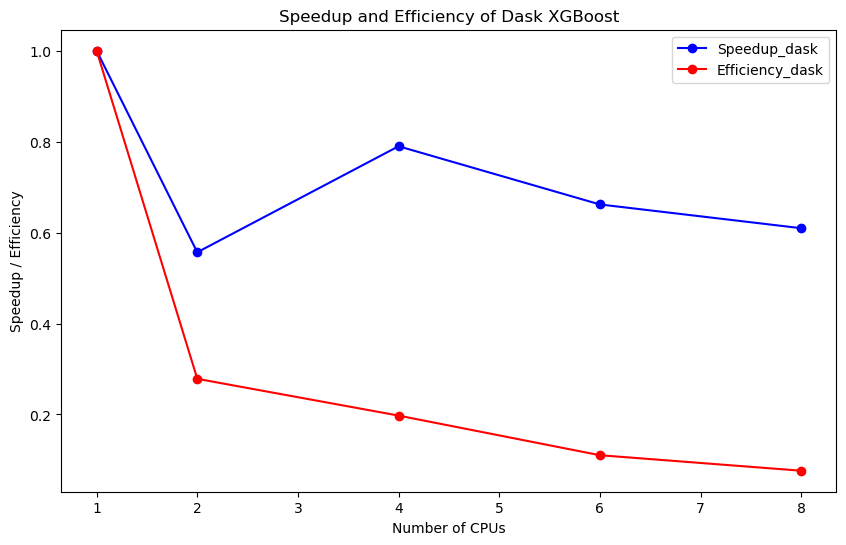

In [51]:
time_one_cpu = time_dask[0]

speedups_dask = [time_one_cpu / time for time in time_dask]
efficiencies_dask = [speedup / cpus for speedup, cpus in zip(speedups_dask, cpu_values_dask)]

plt.figure(figsize=(10, 6))

plt.plot(cpu_values_dask, speedups_dask, marker='o', linestyle='-', color='b', label='Speedup_dask')
plt.plot(cpu_values_dask, efficiencies_dask, marker='o', linestyle='-', color='r', label='Efficiency_dask')

plt.xlabel('Number of CPUs')
plt.ylabel('Speedup / Efficiency')
plt.title('Speedup and Efficiency of Dask XGBoost')
plt.legend()

plt.show()

### Conclusion about Parallelism on Gradient Boost model ### 
Here, compared to the parallelism implemented by joblib package (by setting the n_jobs parameter in the model), the parallelism implemented by dask is not as efficient.

## Hypertuning

Carrying out hyperparameter tuning to select the best parameters for Gradient Boost model

In [52]:
from sklearn.model_selection import RandomizedSearchCV
#Heyerparamter tuning for XGBoost
param_dist_xgb = {
    'n_estimators': [50,100,150,200,300,400],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6]
}

xgb_clf = RandomizedSearchCV(xgclf,param_dist_xgb,verbose = 2)

In [53]:
start_time = time.time()
xgb_clf.fit(x_train,y_train)

time_xgb_1 =time.time() - start_time
print("time elapsed: ", time_xgb_1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=200; total time=   3.8s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=200; total time=   3.8s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=200; total time=   3.8s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=200; total time=   3.7s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=200; total time=   3.8s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=150; total time=   3.4s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=150; total time=   3.4s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=150; total time=   3.4s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=150; total time=   3.4s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=150; total time=   3.4s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=200; total time=   4.3s
[CV] END ...learning_rate=0.1, max_depth=5, n_es

In [54]:
start_time = time.time()
#Best Hyper paramters for XG Boost
print('Best Parameters for XG Boost :',xgb_clf.best_params_)
preds_xgb_clf_test = xgb_clf.predict(x_test)
print("The accuracy of Gradient Boost model after hyperParameter tuning is: ", model_accuracy(y_test,preds_xgb_clf_test))
print("time elapsed: ", time.time() - start_time)

Best Parameters for XG Boost : {'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.1}
The accuracy of Gradient Boost model after hyperParameter tuning is:  0.97
time elapsed:  0.21709108352661133


Dask can be used to parallelize HyperParameter tuning by using the dask_ml.model_selection.RandomizedSearchCV instead of sklearn.model_selection.RandomizedSearchCV.   
The Dask version is a drop-in replacement for the Scikit-Learn version, designed to work with Dask Arrays and DataFrames.

- Implementing Parallelism by joblib

In [55]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter tuning for XGBoost
param_dist_xgb = {
    'n_estimators': [50,100,150,200,300,400],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6]
}
# Assign numbers of Processes involved
cpus_joblib = [1,2,4,6,8]

# Create a list to store the recorded time taken for each number of processes invoved
times_joblib = [time_xgb_1,]
for cpus in cpus_joblib[1:]:
    
    # Use RandomizedSearchCV with n_jobs=cpus to use designated number of CPU cores
    xgb_clf = RandomizedSearchCV(xgclf, param_dist_xgb, verbose=2)
    
    start_time = time.time()
    xgb_clf.fit(x_train, y_train)
    end_time = time.time()
    times_joblib.append(end_time - start_time)
    print("time elapsed: ", end_time - start_time)
    
for cpus, time in zip(cpus_joblib,times_joblib):
    print(f"Number of CPUs: {cpus} Time taken: {time} ")
    

Fitting 5 folds for each of 10 candidates, totalling 50 fits
time elapsed:  337.2309956550598
[CV] END ....learning_rate=0.1, max_depth=4, n_estimators=50; total time=   4.7s
[CV] END ....learning_rate=0.1, max_depth=4, n_estimators=50; total time=   4.6s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=200; total time=  13.4s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=200; total time=  13.3s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=200; total time=  13.5s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=150; total time=  10.7s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=150; total time=  10.7s
[CV] END ....learning_rate=0.3, max_depth=4, n_estimators=50; total time=   4.7s
[CV] END ....learning_rate=0.3, max_depth=4, n_estimators=50; total time=   4.5s
[CV] END ....learning_rate=0.3, max_depth=4, n_estimators=50; total time=   4.4s
[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=150; total time=   9.2s
[CV] END ...lea

Notice that the output of the last 2 lines:  
for cpus, time in zip(cpus_joblib,times_joblib):  
    print(f"Number of CPUs: {cpus} Time taken: {time} ")  
came out before the actual randomizedSearchCV finished.  
This indicates that the joblib package is indeed running parallelized code asynchronously. 

In [80]:
for cpus, time in zip(cpus_joblib,times_joblib):
    print(f"Number of CPUs: {cpus} Time taken: {time} ")

Number of CPUs: 1 Time taken: 225.86207032203674 
Number of CPUs: 2 Time taken: 337.2309956550598 
Number of CPUs: 4 Time taken: 168.56927037239075 
Number of CPUs: 6 Time taken: 144.81069779396057 
Number of CPUs: 8 Time taken: 185.1511254310608 


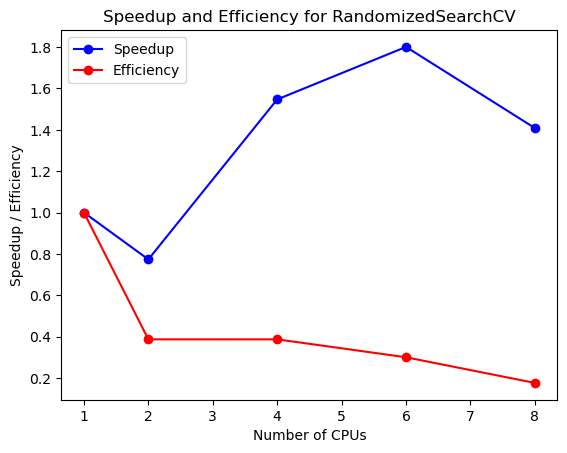

In [57]:
# Calculate speedup
speedup = [times_joblib[0] / time for time in times_joblib]

# Calculate efficiency
efficiency = [s / cpus for s, cpus in zip(speedup, cpus_joblib)]

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot speedup
ax.plot(cpus_joblib, speedup, marker='o', linestyle='-', color='b', label='Speedup')

# Plot efficiency
ax.plot(cpus_joblib, efficiency, marker='o', linestyle='-', color='r', label='Efficiency')

# Set labels and title
ax.set_xlabel('Number of CPUs')
ax.set_ylabel('Speedup / Efficiency')
ax.set_title('Speedup and Efficiency for RandomizedSearchCV')

# Add a legend
ax.legend()

# Show the plot
plt.show()

## Consclusion

We reported a study of parallelism of machine learning modeling and analysis on the credit card fraud data of size 310 MB. 2 models, decision tree and gradient boost, are parallelized and benchmarked to explore the different mechanisms of parallelism provided by python’s multiprocessing package, joblib and dask.   
The result shows that the “best parallelism” depends on the model employed in machine learning. If we choose models with some serial algorithm, such as decision tree, simple parallelism by multiprocessing cannot help much. More advanced parallelism shall be explored for such models. But some packages such as joblib has already been adapted to serial algorithm such as gradient boost, and it will accelerate the modeling significantly.   
Data parallelism by dask does not necessarily contribute positively to parallelized machine learning. If the data set can comfortably fit into the memory, simple multiprocessing parallelization is more efficient than dask.   
When the model and data becomes more complicated, such as involving Grid Search and k fold Cross Validation, more working processes help in accelerating the learning.   
Most of the time, the highest efficiency in a parallelized learning is found when the number of processes equals the number of physical cores available.   

